In [587]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.special import softmax
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings

# ignorování warningů
warnings.simplefilter(action='ignore', category=FutureWarning)


In [588]:
# načtení dat pro první úlohu
first_task_data = pd.read_excel('Projekt-2_Data.xlsx', sheet_name='Úloha 1')
first_task_data


,uloha_1 a),uloha_1 b)_prior,skupina,uloha_1 b)_pozorování
0,2.0,3.634785,0,3.626656
1,2.0,2.868113,0,3.008269
2,1.0,2.149160,0,2.989829
3,3.0,4.263065,0,2.371630
4,0.0,2.594745,0,4.009366
...,...,...,...,...
99995,NaN,1.725637,9999,NaN
99996,NaN,4.048414,9999,NaN
99997,NaN,3.000662,9999,NaN
99998,NaN,3.058451,9999,NaN


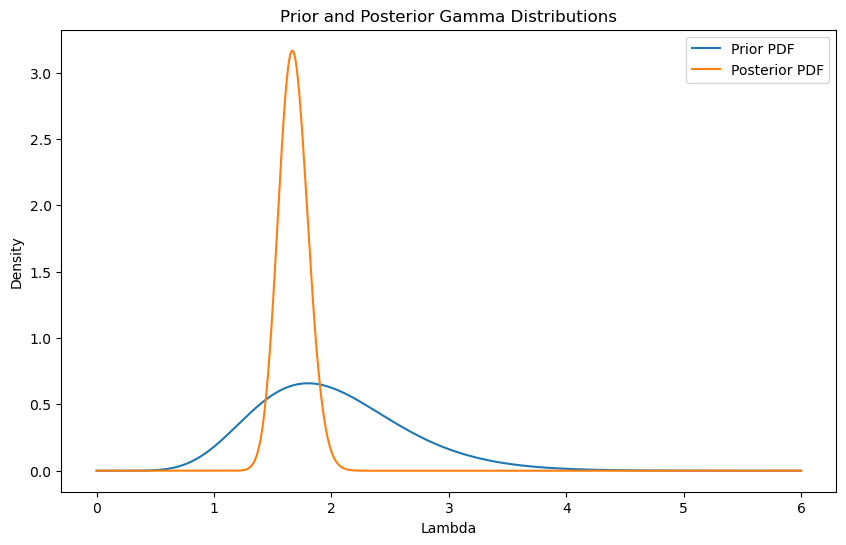

In [589]:
subtask_a_data = first_task_data["uloha_1 a)"].dropna()

alpha_prior = 10.0
beta_prior = 5.0

alpha_posterior = alpha_prior + subtask_a_data.sum()
beta_posterior = beta_prior + subtask_a_data.size

lambda_values = np.linspace(0, 6, 10000)

prior_pdf = stats.gamma.pdf(lambda_values, a=alpha_prior, scale= 1 / beta_prior)
posterior_pdf = stats.gamma.pdf(lambda_values, a=alpha_posterior, scale= 1 / beta_posterior)

plt.figure(figsize=(10, 6))
plt.plot(lambda_values, prior_pdf, label='Prior PDF')
plt.plot(lambda_values, posterior_pdf, label='Posterior PDF')
plt.title('Prior and Posterior Gamma Distributions')
plt.xlabel('Lambda')
plt.ylabel('Density')
plt.legend()
plt.show()


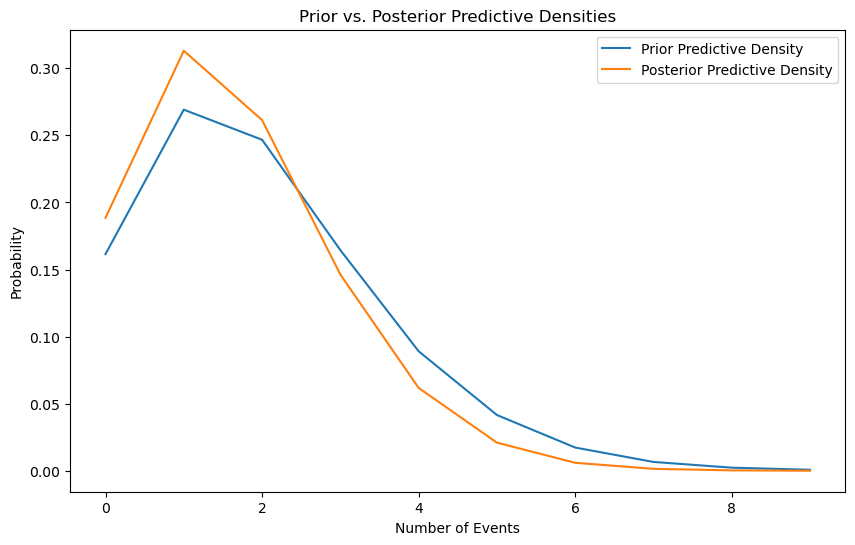

In [590]:
r_prior = alpha_prior
r_posterior = alpha_posterior
p_prior = beta_prior / (beta_prior + 1)
p_posterior = beta_posterior / (beta_posterior + 1)

padding = 5
max_connections = subtask_a_data.max()

x_values = np.arange(0, max_connections + padding)

prior_predictive_probs = stats.nbinom.pmf(x_values, r_prior, p_prior)
posterior_predictive_probs = stats.nbinom.pmf(x_values, r_posterior, p_posterior)

plt.figure(figsize=(10, 6))
plt.plot(x_values, prior_predictive_probs, label='Prior Predictive Density')
plt.plot(x_values, posterior_predictive_probs, label='Posterior Predictive Density')
plt.title('Prior vs. Posterior Predictive Densities')
plt.xlabel('Number of Events')
plt.ylabel('Probability')
plt.legend()
plt.show()


Porovnat intervalové odhady.. TODO!

In [591]:
lower_percentile = 0.025  
upper_percentile = 0.975

lambda_prior_lower = stats.gamma.ppf(lower_percentile, a=alpha_prior, scale=1/beta_prior)
lambda_prior_upper = stats.gamma.ppf(upper_percentile, a=alpha_prior, scale=1/beta_prior)

lambda_posterior_lower = stats.gamma.ppf(lower_percentile, a=alpha_posterior, scale=1/beta_posterior)
lambda_posterior_upper = stats.gamma.ppf(upper_percentile, a=alpha_posterior, scale=1/beta_posterior)

print("95% interval spolehlivosti pro parametr 𝜆 z aprio. rozdělení: <{}, {}>".format(lambda_prior_lower, lambda_prior_upper))
print("95% interval spolehlivosti pro parametr 𝜆 z apost. rozdělení: <{}, {}>".format(lambda_posterior_lower, lambda_posterior_upper))


95% interval spolehlivosti pro parametr 𝜆 z aprio. rozdělení: <0.9590777392264868, 3.416960690283833>
95% interval spolehlivosti pro parametr 𝜆 z apost. rozdělení: <1.4376938284869922, 1.9327207471868797>


Porovnat bodové odhady... TODO!

In [592]:
lambda_posterior_mean = alpha_posterior / beta_posterior
lambda_posterior_median = stats.gamma.median(a=alpha_posterior, scale=1/beta_posterior)
lambda_posterior_mode = lambda_values[posterior_pdf.argmax()]

print("Bodový odhad parametru 𝜆 na základě střední hodnoty:", lambda_posterior_mean)
print("Bodový odhad parametru 𝜆 na základě mediánu:", lambda_posterior_median)
print("Bodový odhad parametru 𝜆 na základě modusu:", lambda_posterior_mode)


Bodový odhad parametru 𝜆 na základě střední hodnoty: 1.6761904761904762
Bodový odhad parametru 𝜆 na základě mediánu: 1.6730169441241727
Bodový odhad parametru 𝜆 na základě modusu: 1.666966696669667


Vybrat jeden pro aprio, jeden pro posterio a komentovat... TODO!

In [593]:
print(r_prior, p_prior)
print(r_posterior, p_posterior)

events_prior_mean = r_prior * (1.0 - p_prior) / p_prior
events_prior_median = stats.nbinom.ppf(0.5, r_prior, p_prior)
events_prior_mode = x_values[prior_predictive_probs.argmax()]


print("(Apriori) Bodový odhad počtu pozorování na základě střední hodnoty:", events_prior_mean)
print("(Apriori) odhad počtu pozorování na základě mediánu:", events_prior_median)
print("(Apriori) odhad počtu pozorování na základě modusu:", events_prior_mode)


events_posterior_mean = r_posterior * (1.0 - p_posterior) / p_posterior
events_posterior_median = stats.nbinom.ppf(0.5, r_posterior, p_posterior)
events_posterior_mode = x_values[prior_predictive_probs.argmax()]

print("(Aposteriori) Bodový odhad počtu pozorování na základě střední hodnoty:", events_posterior_mean)
print("(Aposteriori) Bodový odhad počtu pozorování na základě mediánu:", events_posterior_median)
print("(Aposteriori) Bodový odhad počtu pozorování na základě modusu:", events_posterior_mode)


10.0 0.8333333333333334
176.0 0.9905660377358491
(Apriori) Bodový odhad počtu pozorování na základě střední hodnoty: 1.9999999999999996
(Apriori) odhad počtu pozorování na základě mediánu: 2.0
(Apriori) odhad počtu pozorování na základě modusu: 1.0
(Aposteriori) Bodový odhad počtu pozorování na základě střední hodnoty: 1.6761904761904758
(Aposteriori) Bodový odhad počtu pozorování na základě mediánu: 1.0
(Aposteriori) Bodový odhad počtu pozorování na základě modusu: 1.0


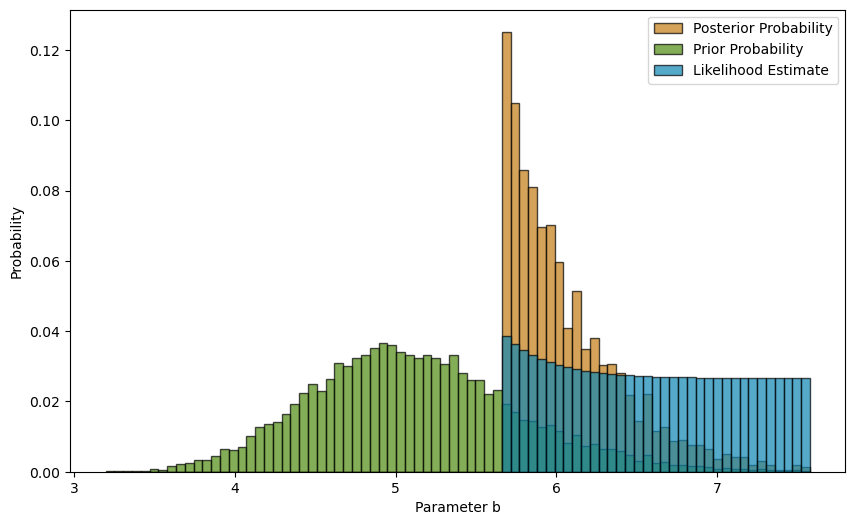

In [594]:
# z každé skupiny vybereme maximální hodnotu
subtask_b_prior = first_task_data[["uloha_1 b)_prior", "skupina"]].groupby("skupina").max()
subtask_b_observations = first_task_data["uloha_1 b)_pozorování"].dropna()

bin_values_num = 80

# soubor maximálních hodnot z jednotlivých skupin setřídíme do 80 binů o stejné šířce
prior_freq, bins = np.histogram(subtask_b_prior, bins=bin_values_num)
prior_prob = prior_freq / prior_freq.sum()

# vypočítáme středy binů
bin_centers = 0.5 * (bins[1:] + bins[:-1])

mu = 3
sigma = 1
a_standard = (1 - mu) / sigma

log_likelihoods = []

# pro středy všech binů (reprezentující parametr b) vypočítáme logaritmus likelihoodu
# jinými slovy vypočítáme, jak dobře odpovídají poskytnutá pozorování odseknutému normálnímu
# rozdělení pro různé hodnoty parametru b
for b in bin_centers:
  b_standard = (b - mu) / sigma
  log_pdf_values = stats.truncnorm(a=a_standard, b=b_standard, loc=mu, scale=sigma).logpdf(subtask_b_observations)
  log_likelihoods.append(np.sum(log_pdf_values))


# pomocí softmaxu převedeme logaritmy likelihoodů na pravděpodobnosti
likelihood_prob = softmax(log_likelihoods)


# vypočítáme aposteriorní pravděpodobnosti pomocí Bayesova vzorce
posterior_freq = prior_prob * likelihood_prob
posterior_prob = posterior_freq / posterior_freq.sum()

plt.figure(figsize=(10, 6))
plt.hist(bins[:-1], bins, weights=posterior_prob, label='Posterior Probability', alpha=0.7, color='#C47B12', edgecolor='black')
plt.hist(bins[:-1], bins, weights=prior_prob, label='Prior Probability', alpha=0.7, color='#508A11', edgecolor='black')
plt.hist(bins[:-1], bins, weights=likelihood_prob, label='Likelihood Estimate', alpha=0.7, color='#0F86B3', edgecolor='black')
plt.xlabel('Parameter b')
plt.ylabel('Probability')
plt.legend()
plt.show()


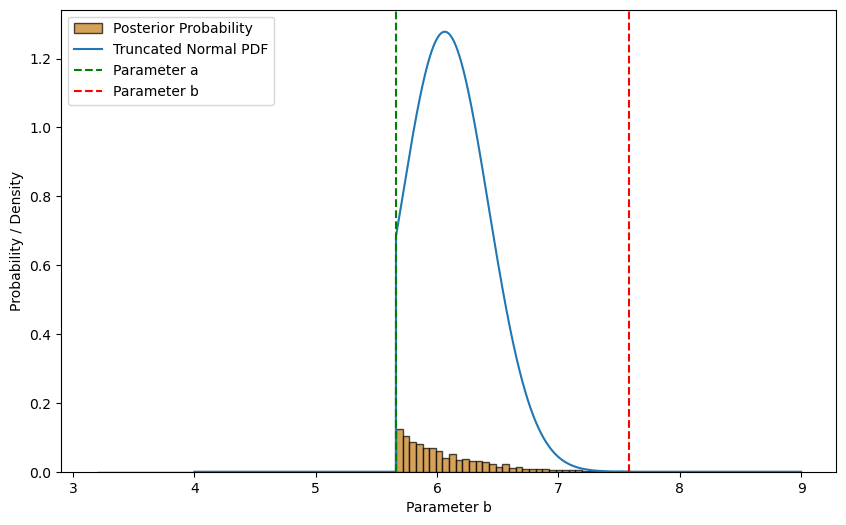

(Histogram) 95% interval spolehlivosti pro parametr b z apost. rozdělení: <5.688232034015019, 7.003430634180411>
(Hustota pravděpodobnosti) 95% interval spolehlivosti pro parametr b z apost. rozdělení: <5.695559618614321, 6.788843572739788>


In [595]:
# výpočet 95% intervalu spolehlivosti na základě histogramu
cumulative_probs = np.cumsum(posterior_prob)

# najdeme bin, který +- odpovídá 2.5 percentilu
lower_idx = np.argmax(cumulative_probs >= 0.025)
b_posteriro_lower_hist = bin_centers[lower_idx]

# najdeme bin, který +- odpovídá 97.5 percentilu
upper_idx = np.argmax(cumulative_probs >= 0.975)
b_posteriro_upper_hist = bin_centers[upper_idx]

mean = np.sum(bin_centers * posterior_prob)
std_dev = np.sqrt(np.sum(posterior_prob * (bin_centers - mean)**2))

# výpočet 95% intervalu spolehlivosti na základě hustoty pravděpodobnosti
a = posterior_prob.nonzero()[0][0]
a_standard = (bins[a] - mean) / std_dev
b_standard = (bins[-1] - mean) / std_dev

x_range = np.linspace(4, 9, 5000)

plt.figure(figsize=(10, 6))
plt.hist(bins[:-1], bins, weights=posterior_prob, label='Posterior Probability', alpha=0.7, color='#C47B12', edgecolor='black')
plt.plot(x_range, stats.truncnorm.pdf(x_range, a=a_standard, b=b_standard, loc=mean, scale=std_dev), label='Truncated Normal PDF',)
plt.axvline(x=bins[a], color='green', linestyle='--', label='Parameter a')
plt.axvline(x=bins[-1], color='red', linestyle='--', label='Parameter b')
plt.xlabel('Parameter b')
plt.ylabel('Probability / Density')
plt.legend()
plt.show()

b_posteriro_lower_pdf = stats.truncnorm.ppf(lower_percentile, a=a_standard, b=b_standard, loc=mean, scale=std_dev)
b_posteriro_upper_pdf = stats.truncnorm.ppf(upper_percentile, a=a_standard, b=b_standard, loc=mean, scale=std_dev)

print("(Histogram) 95% interval spolehlivosti pro parametr b z apost. rozdělení: <{}, {}>".format(b_posteriro_lower_hist, b_posteriro_upper_hist))
print("(Hustota pravděpodobnosti) 95% interval spolehlivosti pro parametr b z apost. rozdělení: <{}, {}>".format(b_posteriro_lower_pdf, b_posteriro_upper_pdf))


In [596]:
mode = bin_centers[posterior_prob.argmax()]
median = stats.truncnorm.median(a=a_standard, b=b_standard, loc=mean, scale=std_dev)

print("Bodový odhad parametru b na základě střední hodnoty:", mean)
print("Bodový odhad parametru b na základě mediánu:", median)
print("Bodový odhad parametru b na základě modusu:", mode)


Bodový odhad parametru b na základě střední hodnoty: 6.063248915799402
Bodový odhad parametru b na základě mediánu: 6.122678249666167
Bodový odhad parametru b na základě modusu: 5.688232034015019


In [597]:
# načtení dat pro druhou úlohu
second_task_data = pd.read_excel('Projekt-2_Data.xlsx', sheet_name='Úloha 2')

# vytvoříme dummy proměnné pro kategorickou proměnnou OSType
# IS_MacOS == 0 ^ IS_Windows == 0 ^ IS_iOS == 0 => IS_Android == 1
dummy_variables = pd.get_dummies(second_task_data['OSType'], drop_first=True, prefix="IS").astype(float)  

# z data framu odstraníme původní kategorickou proměnnou a přidáme dummy proměnné
second_task_data = second_task_data.drop('OSType', axis=1).join(dummy_variables)
second_task_data.head()


,ActiveUsers,InteractingPct,ScrollingPct,Ping [ms],IS_MacOS,IS_Windows,IS_iOS
0,4113,0.8283,0.1717,47,0.0,0.0,1.0
1,7549,0.3461,0.6539,46,0.0,0.0,1.0
2,8855,0.2178,0.7822,55,0.0,1.0,0.0
3,8870,0.0794,0.9206,56,0.0,0.0,0.0
4,9559,0.7282,0.2718,76,1.0,0.0,0.0


,ActiveUsers,InteractingPct,ScrollingPct
ActiveUsers,1.000000,0.040275,-0.040275
InteractingPct,0.040275,1.000000,-1.000000
ScrollingPct,-0.040275,-1.000000,1.000000


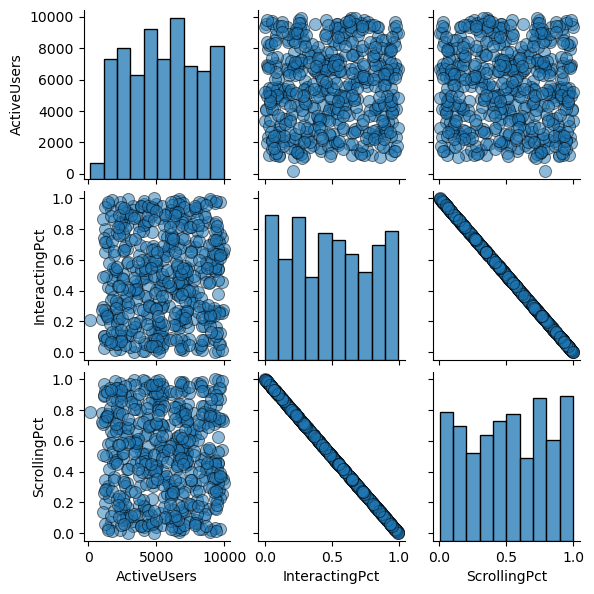

In [598]:
predictors = second_task_data[['ActiveUsers', 'InteractingPct', 'ScrollingPct']]

# vztahy jednotlivých prediktorů
sns.pairplot(predictors, plot_kws={'alpha': 0.5, 's': 75, 'edgecolor': 'k'}, height=2.)

# korelační matice prediktorů
predictors.corr()


In [599]:
# proměnné InteractingPct a ScrollingPct jsou závislé, jednu z nich tedy odstraníme
second_task_data.drop('InteractingPct', axis=1, inplace=True)
second_task_data.head()


,ActiveUsers,ScrollingPct,Ping [ms],IS_MacOS,IS_Windows,IS_iOS
0,4113,0.1717,47,0.0,0.0,1.0
1,7549,0.6539,46,0.0,0.0,1.0
2,8855,0.7822,55,0.0,1.0,0.0
3,8870,0.9206,56,0.0,0.0,0.0
4,9559,0.2718,76,1.0,0.0,0.0


In [600]:
# přidání kvadratických členů
second_task_data['ActiveUsers_squared'] = second_task_data['ActiveUsers'] ** 2
second_task_data['ScrollingPct_squared'] = second_task_data['ScrollingPct'] ** 2

predictors = ['ActiveUsers', 'ActiveUsers_squared', 'ScrollingPct', 'ScrollingPct_squared', 
              'IS_MacOS', 'IS_Windows', 'IS_iOS']

X = sm.add_constant(second_task_data[predictors])
y = second_task_data['Ping [ms]']

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              Ping [ms]   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     277.1
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          1.45e-166
Time:                        19:11:39   Log-Likelihood:                -1664.2
No. Observations:                 502   AIC:                             3344.
Df Residuals:                     494   BIC:                             3378.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   24.7505 